##### Libraries
First we’re importing all the libraries we’ll be using. Not many, really... Numpy, gym & random

In [1]:
import numpy as np
import pandas as pd
import gym
import random
from matplotlib import pyplot as plt

c:\users\smrut\appdata\local\programs\python\python37\lib\site-packages\numpy\_distributor_init.py:32: UserWarning: loaded more than 1 DLL from .libs:
c:\users\smrut\appdata\local\programs\python\python37\lib\site-packages\numpy\.libs\libopenblas.IPBC74C7KURV7CB2PKT5Z5FNR3SIBV4J.gfortran-win_amd64.dll
c:\users\smrut\appdata\local\programs\python\python37\lib\site-packages\numpy\.libs\libopenblas.TXA6YQSD3GCQQC22GEQ54J2UDCXDXHWN.gfortran-win_amd64.dll
  stacklevel=1)


##### Creating the environment
Next, to create our environment, we just call gym.make() and pass a string of the name of the environment we want to set up. We'll be using the environment FrozenLake-v0. All the environments with their corresponding names you can use here are available on [Gym’s website](https://gym.openai.com/envs/#classic_control).

In [2]:
env = gym.make("FrozenLake-v0")

##### Creating the Q-table
We’re now going to construct our Q-table, and initialize all the Q-values to zero for each state-action pair.

Remember, the number of rows in the table is equivalent to the size of the state space in the environment, and the number of columns is equivalent to the size of the action space. We can get this information using using env.observation_space.n and env.action_space.n, as shown below. We can then use this information to build the Q-table and fill it with zeros.

In [3]:
action_space_size = env.action_space.n
state_space_size = env.observation_space.n

q_table = np.zeros((state_space_size, action_space_size))

If you're foggy about Q-tables at all, be sure to check out the earlier post where we covered all the details you need for Q-tables.

Alright, here’s our Q-table!

In [4]:
print(q_table)

[[0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]]


##### Initializing Q-learning parameters
Now, we’re going to create and initialize all the parameters needed to implement the Q-learning algorithm.

In [5]:
num_episodes = 100000
max_steps_per_episode = 100

learning_rate = 0.01
discount_rate = 0.90

exploration_rate = 1
max_exploration_rate = 1
min_exploration_rate = 0.01
exploration_decay_rate = 0.001

Let's step through each of these.

First, with num_episodes, we define the total number of episodes we want the agent to play during training. Then, with max_steps_per_episode, we define a maximum number of steps that our agent is allowed to take within a single episode. So, if by the one-hundredth step, the agent hasn’t reached the frisbee or fallen through a hole, then the episode will terminate with the agent receiving zero points.

Next, we set our learning_rate, which was mathematically shown using the symbol 
α
 in the previous post. Then, we also set our discount_rate, as well, which was represented with the symbol 
γ
 previously.
 
 Now, the last four parameters are all for related to the exploration-exploitation trade-off we talked about last time in regards to the epsilon-greedy policy. We’re initializing our exploration_rate to 1 and setting the max_exploration_rate to 1 and a min_exploration_rate to 0.01. The max and min are just bounds to how large or small our exploration rate can be. Remember, the exploration rate was represented with the symbol 
ϵ
 when we discussed it previously.

Lastly, we set the exploration_decay_rate to 0.01 to determine the rate at which the exploration_rate will decay.

##### Coding the Q-learning algorithm training loop
Let’s start from the top.

First, we create this list to hold all of the rewards we’ll get from each episode. This will be so we can see how our game score changes over time. We’ll discuss this more in a bit

In [6]:
rewards_all_episodes = []

In the following block of code, we’ll implement the entire Q-learning algorithm we discussed in detail in a couple posts back. When this code is executed, this is exactly where the training will take place. This first for-loop contains everything that happens within a single episode. This second nested loop contains everything that happens for a single time-step.

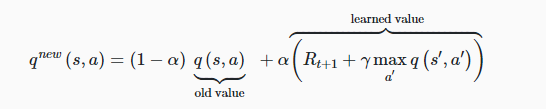

********Average reward per thousand episodes********

1000 :  0.022000000000000013
2000 :  0.06100000000000005
3000 :  0.05300000000000004
4000 :  0.06100000000000005
5000 :  0.06100000000000005
6000 :  0.059000000000000045
7000 :  0.06600000000000004
8000 :  0.060000000000000046
9000 :  0.06500000000000004
10000 :  0.06400000000000004
11000 :  0.05200000000000004
12000 :  0.07300000000000005
13000 :  0.05500000000000004
14000 :  0.07100000000000005
15000 :  0.06800000000000005
16000 :  0.058000000000000045
17000 :  0.05500000000000004
18000 :  0.06600000000000004
19000 :  0.07100000000000005
20000 :  0.057000000000000044
21000 :  0.058000000000000045
22000 :  0.05400000000000004
23000 :  0.06200000000000005
24000 :  0.06300000000000004
25000 :  0.06200000000000005
26000 :  0.058000000000000045
27000 :  0.05100000000000004
28000 :  0.06400000000000004
29000 :  0.06400000000000004
30000 :  0.059000000000000045
31000 :  0.06600000000000004
32000 :  0.06600000000000004
33000 :  0.06000000

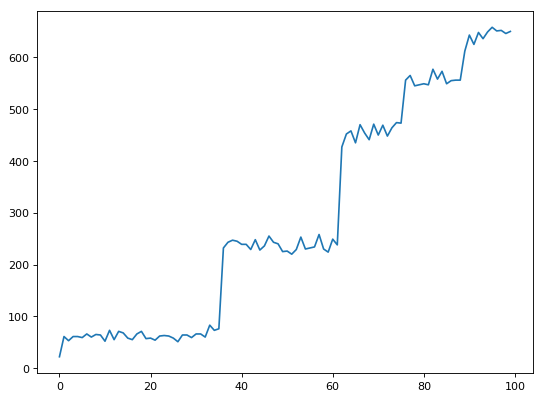

In [7]:
# Q-learning algorithm
for episode in range(num_episodes):
    # initialize new episode params
    state = env.reset()
    done = False
    rewards_current_episode = 0
    for step in range(max_steps_per_episode):
        # Exploration-exploitation trade-off
        exploration_rate_threshold = random.uniform(0, 1)
        if exploration_rate_threshold > exploration_rate:
            action = np.argmax(q_table[state,:])
        else:
            action = env.action_space.sample()
        # Take new action
        new_state, reward, done, info = env.step(action)
        # Update Q-table
        q_table[state, action] = q_table[state, action] * (1 - learning_rate) + \
        learning_rate * (reward + discount_rate * np.max(q_table[new_state, :]))
        # Set new state
        state = new_state
        # Add new reward
        rewards_current_episode += reward
        if done == True: 
            break

    # Exploration rate decay
    exploration_rate = min_exploration_rate + \
    (max_exploration_rate - min_exploration_rate) * np.exp(-exploration_decay_rate * episode)
    # Add current episode reward to total rewards list
    rewards_all_episodes.append(rewards_current_episode)

# Calculate and print the average reward per thousand episodes
rewards_per_thosand_episodes = np.split(np.array(rewards_all_episodes),num_episodes/1000)
count = 1000

print("********Average reward per thousand episodes********\n")
for r in rewards_per_thosand_episodes:
    print(count, ": ", str(sum(r/1000)))
    count += 1000

# Ploting average reward per 1000 episode 
plt.figure(num=None, figsize=(8, 6), dpi=80, facecolor='w', edgecolor='k')
plt.plot(np.array(rewards_per_thosand_episodes).sum(axis=1))
plt.show()

In [8]:
# Print updated Q-table
pd.DataFrame(q_table).to_csv(r".\q_table.csv", header = None, index = None)
print("\n\n********Q-table********\n")
print(q_table)



********Q-table********

[[0.06975784 0.05968359 0.05880841 0.0534772 ]
 [0.00654037 0.03947143 0.01089902 0.01278781]
 [0.03342469 0.02412508 0.05770289 0.01535915]
 [0.02593963 0.00615315 0.00371123 0.00865347]
 [0.09614268 0.07214286 0.06880469 0.04823377]
 [0.         0.         0.         0.        ]
 [0.10525693 0.03849915 0.04729458 0.00795693]
 [0.         0.         0.         0.        ]
 [0.0717684  0.11271372 0.09118796 0.15148042]
 [0.14541228 0.26603554 0.19169331 0.12504324]
 [0.3226555  0.22720191 0.18951676 0.08306473]
 [0.         0.         0.         0.        ]
 [0.         0.         0.         0.        ]
 [0.17482321 0.236028   0.38856152 0.18967019]
 [0.3437354  0.66429884 0.54931684 0.47933703]
 [0.         0.         0.         0.        ]]
